In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
AA3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K','ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W','ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}
AA1to3 = {}
for i in range(len(list(AA3to1.keys()))):
    AA1to3[list(AA3to1.values())[i]] = list(AA3to1.keys())[i]

In [4]:
AA = 'SSGLVPRGSHMRGPNPTAASLEASAGPFTVRSFTVSRPSGYGAGTVYYPTNAGGTVGAIAIVPGYTARQSSIKWWGPRLASHGFVVITIDTNSTLDQPSSRSSQQMAALRQVASLNGTSSSPIYGKVDTARMGVMGWSMGGGGSLISAANNPSLKAAAPQAPWDSSTNFSSVTVPTLIFACENDSIAPVNSSALPIYDSMSRNAKQFLEINGGSHSCANSGNSNQALIGKKGVAWMKRFMDNDTRYSTFACENPNSTRVSDFRTANCSLEDPAANKARKEAELAAATAEQ'
Am = list(AA)
Am3 = []
for i in range(len(Am)):
    Am3.append(AA1to3[Am[i]])

In [5]:
CodonDict={'ATT':'I',   'ATC':'I',  'ATA':'I',  'CTT':'L',  'CTC':'L',  
'CTA':'L',  'CTG':'L',  'TTA':'L',  'TTG':'L',  'GTT':'V',  'GTC':'V',  
'GTA':'V',  'GTG':'V',  'TTT':'F',  'TTC':'F',  'ATG':'M',  'TGT':'C',  
'TGC':'C',  'GCT':'A',  'GCC':'A',  'GCA':'A',  'GCG':'A',  'GGT':'G',  
'GGC':'G',  'GGA':'G',  'GGG':'G',  'CCT':'P',  'CCC':'P',  'CCA':'P',  
'CCG':'P',  'ACT':'T',  'ACC':'T',  'ACA':'T',  'ACG':'T',  'TCT':'S',  
'TCC':'S',  'TCA':'S',  'TCG':'S',  'AGT':'S',  'AGC':'S',  'TAT':'Y',  
'TAC':'Y',  'TGG':'W',  'CAA':'Q',  'CAG':'Q',  'AAT':'N',  'AAC':'N',  
'CAT':'H',  'CAC':'H',  'GAA':'E',  'GAG':'E',  'GAT':'D',  'GAC':'D',  
'AAA':'K',  'AAG':'K',  'CGT':'R',  'CGC':'R',  'CGA':'R',  'CGG':'R',  
'AGA':'R',  'AGG':'R',  'TAA':'X',  'TAG':'X',  'TGA':'X'}

In [6]:
AAtoGEN = {}
for i in range(len(list(CodonDict.keys()))):
    AAtoGEN[list(CodonDict.values())[i]] = list(CodonDict.keys())[i]

In [7]:
Gen = []
for i in range(len(Am)):
    Gen.append(AAtoGEN[Am[i]])

In [8]:
Gen = np.array(Gen)

In [9]:
def mutation(gen):
    g = ''.join(gen)
    idx = np.random.randint(len(g))
    a = ['A','T','G','C']
    i = np.random.randint(4)
    d = list(g)
    d[idx] = a[i]
    g = ''.join(d)
    p = []
    for i in range(0,len(g),3):
        p.append(CodonDict[g[i:i+3]])
    return ''.join(p), g

Gillespi

In [ ]:
for k  in range(10):
    n_0 = 50
    ge = Gen
    n_max = 10000
    t = [0]
    pob = [0 for i in range(n_0)]
    n_mu = [0]
    n_mu2 = [0]
    n_n = [0]
    t_mu = [0]
    j=0
    f=0
    fit= [f]
    i=1
    b = 0
    stop=False
    while(True):
        g = 2.0*len(pob)+0.01*f*pob.count(1)
        ga = len(pob)+0.01*b*pob.count(2)
        mu = g * 0.01 
        s = g + ga + mu
        t_new = -1/s * np.log(np.random.random())
        t.append(t[i-1]+t_new)

        alpha = np.random.random()
        if(g > alpha * s and len(pob)<=n_max):
            r = np.array([0,1,2])
            prob = np.array([0, 0.33 + 0.1 * f, 0.33 + 0.1 * b])
            prob[0] = 1 - prob[1] - prob[2]
            pob.append(np.random.choice(r,p=prob))
        if(ga > alpha * s):
            idx = np.random.randint(len(pob))
            pob.pop(idx)
        if(mu > alpha * s):
            p, ge1 = mutation(ge)
            if (p[64] == 'Y'or p[138] == 'M' or p[137] == 'S' ):
                ge = ge1
                pob.append(1)
                if (p[67] == 'A' or p[67] == 'V' or p[94] == 'V' or p[215] == 'F' or p[185] == 'F' or p[217] == 'P'):
                    f = 0.34 * np.random.random()  
                if (p[67] == 'A' and p[94] == 'V' and p[215] == 'F' and p[185] == 'F' and p[217] == 'P'):
                    f = 0.80 * np.random.random()
                    print(t[i])
                    stop = True
            else:
                b = -0.45 * np.random.random()
                pob.append(2)
        n_mu.append(pob.count(1))
        n_n.append(pob.count(0))
        n_mu2.append(pob.count(2))
        fit.append(f)
        if(t[i]>10 or stop):
            break
        if(i%1000 == 0):
            print(i,t[i],f)
        i+=1
        
    plt.plot(t,n_mu)
    
    print(AA[67], AA[94], AA[215], AA[185], AA[217])
    print(p[67], p[94], p[215], p[185], p[217])

plt.xlabel('time')
plt.ylabel('number of mutants')
plt.show()
plt.savefig("mutants23.pdf") 

1000 1.9800345772710894 0
2000 2.5966448990693363 0
3000 2.947371492723727 0
4000 3.216883727798316 0
5000 3.424616626314624 0
6000 3.6051192573179076 0
7000 3.7564570066901926 0
8000 3.8814787290477035 0
9000 3.9990337278625465 0
10000 4.09543574013064 0
11000 4.188517095610879 0
12000 4.268758415595836 0
13000 4.343945100200056 0
14000 4.416138509031249 0
15000 4.485737705789569 0
16000 4.547767604342821 0
17000 4.6076748571141515 0
18000 4.665205888555518 0
19000 4.716312537045377 0
20000 4.76700637957013 0
21000 4.814576274134255 0
22000 4.859147608976749 0
23000 4.901709560081029 0
24000 4.943371098452172 0
25000 4.984532163209755 0
26000 5.021945200240676 0
27000 5.060969287595777 0
28000 5.098258232448085 0
29000 5.130815073136896 0
30000 5.16315511360691 0
31000 5.197464583683407 0
32000 5.229161056523186 0
33000 5.261808715225089 0
34000 5.29398179666076 0
35000 5.328430527463216 0
36000 5.3631869209023675 0
37000 5.395845726395359 0
38000 5.42761350189005 0
39000 5.4620310111

84000 6.924628707277966 0.17858629122827635
85000 6.959072350593673 0.17858629122827635
86000 6.992457806741722 0.17858629122827635
87000 7.024007356367745 0.17858629122827635
88000 7.0566999152039545 0.17858629122827635
89000 7.090540262252345 0.17858629122827635
90000 7.122100343230877 0.17858629122827635
91000 7.15476348649838 0.17858629122827635
92000 7.187564609646586 0.17858629122827635
93000 7.220590139524919 0.17858629122827635
94000 7.253435181352286 0.17858629122827635
95000 7.284632465708995 0.17858629122827635
96000 7.317352070939321 0.17858629122827635
97000 7.348493891411927 0.17858629122827635
98000 7.380560173411297 0.17858629122827635
99000 7.414589460714349 0.17858629122827635
100000 7.4476718511429825 0.17858629122827635
101000 7.480996609563075 0.17858629122827635
102000 7.514617746481116 0.17858629122827635
103000 7.547395035345669 0.17858629122827635
104000 7.580763997191616 0.17858629122827635
105000 7.614459438331486 0.17858629122827635
106000 7.646768927237899 

147000 9.164078582985665 0.2097165031081042
148000 9.196929595743415 0.3129805539919268
149000 9.230711045687716 0.31053649625534563
150000 9.263670124056476 0.2275306872293031
151000 9.296727984748216 0.1333111837916686
152000 9.32896372076975 0.08200142850376835
153000 9.361628915021013 0.23388155018157814
154000 9.394450398693627 0.32732424235661456
155000 9.427612088663125 0.255002687000765
156000 9.460891222626808 0.13619158768743672
157000 9.493141058852517 0.1884164668471137
158000 9.52507866878854 0.31986324884293915
159000 9.557587864718611 0.20731755736512872
160000 9.589660385487464 0.07040906094863389
161000 9.623170941256232 0.019951483301647133
162000 9.655718216813296 0.17014674573240335
163000 9.68858720714508 0.3052298232283863
164000 9.721068681019766 0.047964544362605166
165000 9.753805880935792 0.047964544362605166
166000 9.787083771657342 0.047964544362605166
167000 9.818545642116813 0.047964544362605166
168000 9.85056657460859 0.047964544362605166
169000 9.8814824

99000 7.213565476397166 0
100000 7.247156250414933 0
101000 7.2787685775663125 0
102000 7.311705174874025 0
103000 7.3436912297016335 0
104000 7.378399477391763 0
105000 7.411943930562306 0
106000 7.445854044413364 0
107000 7.479062174121963 0
108000 7.512133081314825 0
109000 7.543831522677461 0
110000 7.576836614989403 0
111000 7.610817457349712 0
112000 7.64417636034826 0
113000 7.679654292230789 0
114000 7.7127117794701805 0
115000 7.7474256649530115 0
116000 7.780392352839791 0
117000 7.813055030900958 0
118000 7.846932555434378 0
119000 7.880528545225552 0
120000 7.914682305762731 0
121000 7.947134543225229 0
122000 7.97967982138352 0
123000 8.010752876208565 0
124000 8.043449958317355 0
125000 8.077383163459174 0
126000 8.11054653672017 0
127000 8.145123167993772 0
128000 8.17918507932857 0
129000 8.21291044595383 0
130000 8.247496227660497 0
131000 8.279292149786803 0
132000 8.310607878238628 0
133000 8.343900596638706 0
134000 8.375946891983663 0
135000 8.409467842139065 0
136

160000 9.722948993163788 0.27406437329368416
161000 9.755750752755066 0.2296155959426365
162000 9.789793635353693 0.3087696563937922
163000 9.822065707340519 0.2405208612921916
164000 9.853916900143314 0.05671402906375736
165000 9.886715313189061 0.2136676484186445
166000 9.91908518504307 0.2037028814531408
167000 9.952917797232805 0.030859123968875628
168000 9.986277221461593 0.03583783585885937
R L S I A
G A T A P
1000 1.7931914006336154 0
2000 2.3875732025236553 0
3000 2.741711886180617 0
4000 3.0071128473749926 0
5000 3.2307602292715014 0
6000 3.4031966256759767 0
7000 3.5529692070719037 0
8000 3.686236371105557 0
9000 3.8007391667275927 0
10000 3.9042598665798325 0
11000 3.998280049117258 0
12000 4.081551381347016 0
13000 4.154914650512985 0
14000 4.224029630653702 0
15000 4.293572971933554 0
16000 4.355727946012819 0
17000 4.413518021293256 0
18000 4.4701645903757 0
19000 4.522668643700832 0
20000 4.570701106872348 0
21000 4.6153716850943685 0
22000 4.658738088852643 0
23000 4.69

In [10]:
p

'PEPWRSPGPNXGLKRRQNLNXARHNFFHYCQLACNAGQGXVWRVXKLIRPLLSLWAAPSLQQMANLALAAGDFYRKQIPRASRFGFHEESSRSLQYRAGSLSNLLVLWLRCIPPCSGVPVPGGSWPLQCRCGXTSSSNRWIPGXQLSXAKRTYALKFAGFTPSCIPQGXISDSRIASQYVPSPGHNDFTTGQSWGTEEPPGINARSVRXQTEQPNLNLQCVPKIRLSKTGPCNPSRSQVTSRENHAPTIRTLDQFLRCPLGCTRXXGATVNQRVHVDNDKAYRYHGPXXX'

In [11]:
AA

'SSGLVPRGSHMRGPNPTAASLEASAGPFTVRSFTVSRPSGYGAGTVYYPTNAGGTVGAIAIVPGYTARQSSIKWWGPRLASHGFVVITIDTNSTLDQPSSRSSQQMAALRQVASLNGTSSSPIYGKVDTARMGVMGWSMGGGGSLISAANNPSLKAAAPQAPWDSSTNFSSVTVPTLIFACENDSIAPVNSSALPIYDSMSRNAKQFLEINGGSHSCANSGNSNQALIGKKGVAWMKRFMDNDTRYSTFACENPNSTRVSDFRTANCSLEDPAANKARKEAELAAATAEQ'

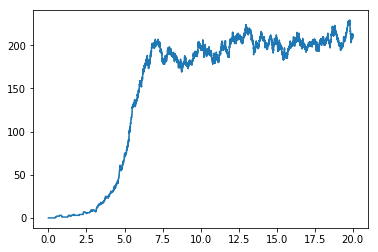

In [12]:
plt.plot(t,n_mu) 
plt.show()